## Домашняя работа 2

1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.

2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

### 1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('fifa_s2.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

In [6]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,2399.000000,2399.000000,2399.000000,2399.000000,2142.000000,2399.000000,2389.000000,2393.000000,2399.000000,2399.000000,2399.000000,2396.000000
mean,212033.680700,25.213005,69.115048,74.115048,5980.873016,24.178825,1.308497,2.469703,2016.145894,5.955300,166.802782,10690.033498
std,30549.399068,4.633622,8.060195,7.190957,11963.420681,49.552098,0.687175,0.844531,2.085829,0.219249,15.241015,21780.029323
min,1179.000000,16.000000,47.000000,48.000000,20.000000,0.000000,1.000000,1.000000,2000.000000,5.250000,121.000000,35.000000
25%,195105.000000,22.000000,64.000000,69.000000,500.000000,1.000000,1.000000,2.000000,2016.000000,5.833333,154.000000,1100.000000
50%,218745.000000,25.000000,69.000000,74.000000,1100.000000,5.000000,1.000000,2.000000,2017.000000,6.000000,165.000000,3800.000000
75%,234576.000000,29.000000,74.000000,79.000000,6000.000000,22.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,7500.000000
max,246608.000000,44.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.583333,214.000000,228100.000000


In [7]:
df.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   7
Overall                       0
Potential                     0
Club                        241
Value                       257
Wage                          0
Preferred Foot                0
International Reputation     10
Skill Moves                   6
Position                     21
Joined                        0
Contract Valid Until        273
Height                        0
Weight                        0
Release Clause                3
dtype: int64

In [8]:
df_1 = df.isna().sum() / len(df) * 100
df_1

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.291788
Overall                      0.000000
Potential                    0.000000
Club                        10.045852
Value                       10.712797
Wage                         0.000000
Preferred Foot               0.000000
International Reputation     0.416840
Skill Moves                  0.250104
Position                     0.875365
Joined                       0.000000
Contract Valid Until        11.379742
Height                       0.000000
Weight                       0.000000
Release Clause               0.125052
dtype: float64

Отобразим на графике количество пропусков

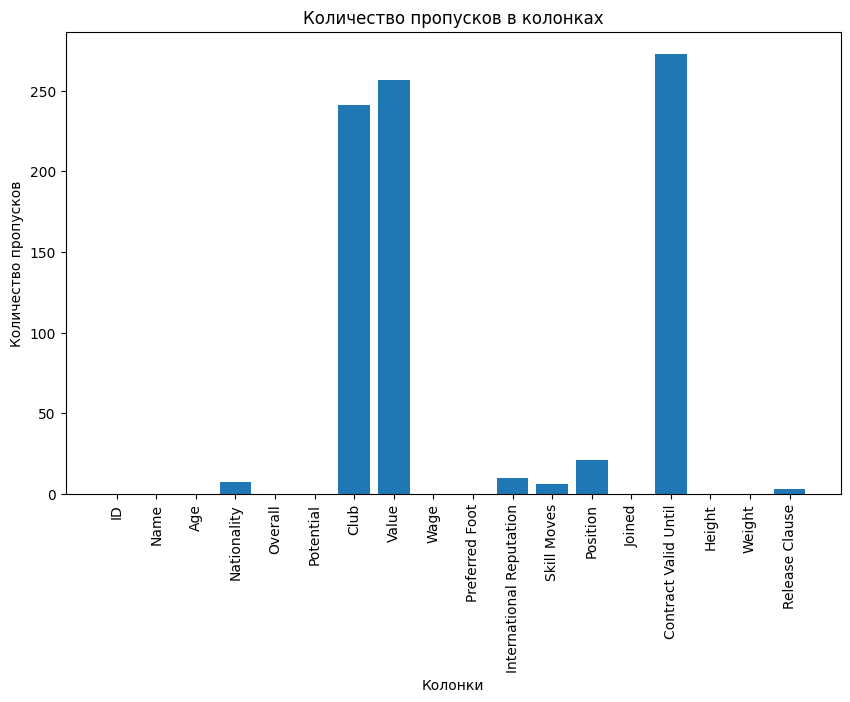

In [9]:
# Подсчет количества пропусков в каждой колонке
missing_values = df.isnull().sum()

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Колонки')
plt.ylabel('Количество пропусков')
plt.title('Количество пропусков в колонках')
plt.xticks(rotation=90)
plt.show();

Как видно из графика, колонки Nationality, Сlub, Value, International Reputation, Skill Moves, Position, Contract Valid Until, Release Clause имеют пропущенные значения. Для решения данной проблемы, колонки с пустыми значениями нужно либо удалить, либо заполнить недостающими данными. В нашем случае сделаем заполнение пропусков.

In [10]:
df['Nationality'] = df['Nationality'].fillna('missing')

In [12]:
df['Club'] = df['Club'].fillna('missing')

In [13]:
df['Position'] = df['Position'].fillna('missing')

In [14]:
df['Contract Valid Until'] = df['Contract Valid Until'].fillna('missing')

В колонках с числовыми данными, пропуски заполним медианныими значениями

In [15]:
df['Value'] = df['Value'].fillna(df['Value'].median())

In [16]:
df['International Reputation'] = df['International Reputation'].fillna(df['International Reputation'].median())

In [17]:
df['Skill Moves'] = df['Skill Moves'].fillna(df['Skill Moves'].median())

In [18]:
df['Release Clause'] = df['Release Clause'].fillna(df['Release Clause'].median())

In [19]:
df.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

### 2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [20]:
df.duplicated().sum()

0

In [21]:
df.Club.unique()

array(['Paris Saint-Germain', 'FC Porto', 'CD Aves', 'FC Bayern München',
       'Cambridge United', 'CD Tondela', 'Juventus', 'Milan', 'Celtic',
       'BSC Young Boys', 'Malmö FF', 'Lazio', 'Arsenal', '1. FC Köln',
       'Bury', 'Roma', 'Carlisle United', 'Manchester United',
       'Burton Albion', 'Inter', 'Chelsea', 'Cagliari', 'Cádiz CF',
       'AS Monaco', '1. FSV Mainz 05', 'Burnley', 'Manchester City',
       'CD Nacional', 'Bristol City', "CD O'Higgins", 'CD Palestino',
       'Brescia', '1. FC Kaiserslautern', 'Brisbane Roar', 'Liverpool',
       'CD Feirense', 'Aston Villa', 'missing', 'Cardiff City',
       'CF Rayo Majadahonda', 'CD Tenerife',
       'CD Universidad de Concepción', 'Atalanta',
       'Borussia Mönchengladbach', 'Brighton & Hove Albion', 'CD Lugo',
       'CD Numancia', 'Sevilla FC', 'CD Leganés', 'CA Osasuna',
       'Lokomotiv Moscow', 'Bayer 04 Leverkusen', 'FC Barcelona',
       'Real Madrid', 'Central Coast Mariners', 'Cerezo Osaka',
       'Charlto

In [22]:
df['Club'] = df['Club'].str.lower()
df['Club'].unique()

array(['paris saint-germain', 'fc porto', 'cd aves', 'fc bayern münchen',
       'cambridge united', 'cd tondela', 'juventus', 'milan', 'celtic',
       'bsc young boys', 'malmö ff', 'lazio', 'arsenal', '1. fc köln',
       'bury', 'roma', 'carlisle united', 'manchester united',
       'burton albion', 'inter', 'chelsea', 'cagliari', 'cádiz cf',
       'as monaco', '1. fsv mainz 05', 'burnley', 'manchester city',
       'cd nacional', 'bristol city', "cd o'higgins", 'cd palestino',
       'brescia', '1. fc kaiserslautern', 'brisbane roar', 'liverpool',
       'cd feirense', 'aston villa', 'missing', 'cardiff city',
       'cf rayo majadahonda', 'cd tenerife',
       'cd universidad de concepción', 'atalanta',
       'borussia mönchengladbach', 'brighton & hove albion', 'cd lugo',
       'cd numancia', 'sevilla fc', 'cd leganés', 'ca osasuna',
       'lokomotiv moscow', 'bayer 04 leverkusen', 'fc barcelona',
       'real madrid', 'central coast mariners', 'cerezo osaka',
       'charlto

In [23]:
df.duplicated().sum()

2

In [24]:
df = df.drop_duplicates().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2397 non-null   int64  
 1   Name                      2397 non-null   object 
 2   Age                       2397 non-null   int64  
 3   Nationality               2397 non-null   object 
 4   Overall                   2397 non-null   int64  
 5   Potential                 2397 non-null   int64  
 6   Club                      2397 non-null   object 
 7   Value                     2397 non-null   float64
 8   Wage                      2397 non-null   int64  
 9   Preferred Foot            2397 non-null   object 
 10  International Reputation  2397 non-null   float64
 11  Skill Moves               2397 non-null   float64
 12  Position                  2397 non-null   object 
 13  Joined                    2397 non-null   int64  
 14  Contract

In [25]:
df.duplicated().sum()

0

### 3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [26]:
def age_group(Age):
    if Age < 20:
        return 'до 20'
    elif 20 <= Age < 30:
        return 'от 20 до 30'
    elif 30 <= Age < 36:
        return 'от 30 до 36'
    elif Age >= 36:
        return 'от 36'
    else:
        'Возраст не определён'

In [27]:
df['Age_group'] = df['Age'].apply(age_group)
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_group
0,1179,G. Buffon,40,Italy,88,88,paris saint-germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0,от 36
1,5479,Casillas,37,Spain,82,82,fc porto,1500.0,10,Left,4.0,1.0,missing,2015,01/01/2019,6.083333,185.0,3000.0,от 36
2,8205,Braga,35,Portugal,70,70,cd aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0,от 30 до 36
3,9014,A. Robben,34,Netherlands,84,84,fc bayern münchen,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0,от 30 до 36
4,19521,J. Ibehre,35,England,61,61,cambridge united,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0,от 30 до 36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,246465,Guerrero,16,Spain,63,76,cf rayo majadahonda,625.0,1,Left,1.0,3.0,CM,2018,01/01/2019,5.916667,165.0,1400.0,до 20
2393,246594,H. Massengo,16,France,62,75,as monaco,450.0,2,Right,1.0,2.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0,до 20
2394,246599,Guillem Jaime,19,Spain,64,80,fc barcelona,975.0,13,Right,1.0,3.0,RW,2018,01/01/2020,5.833333,154.0,2600.0,до 20
2395,246606,Fran García,18,Spain,64,79,real madrid,825.0,9,Left,1.0,2.0,LB,2018,01/01/2019,5.583333,139.0,2200.0,до 20


In [28]:
df['Age_group'].value_counts()

от 20 до 30    1646
от 30 до 36     458
до 20           270
от 36            23
Name: Age_group, dtype: int64

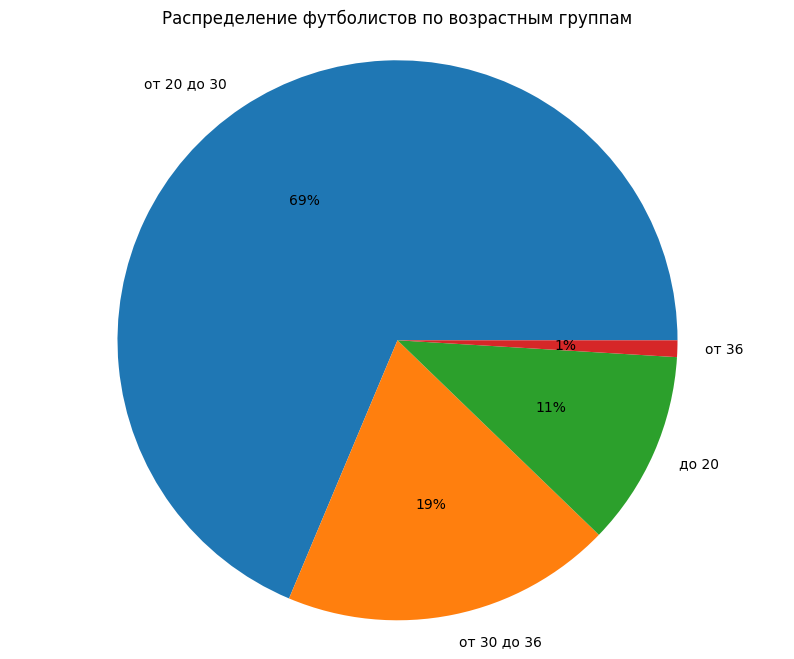

In [32]:
plt.figure(figsize=(10, 8))
df['Age_group'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.title('Распределение футболистов по возрастным группам')
plt.ylabel('')
plt.axis('equal');